作業編號: 1 <p> 學號: 71133116 <p>姓名: 周琦雅

<h3>習題 1</h3>
有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data_dir = 'E:\\淺度機器學習\\data\\'
data = pd.read_csv(data_dir + 'wine.csv')

1.繪製變數間的相關係數圖，以觀察變數間是否存在相關性

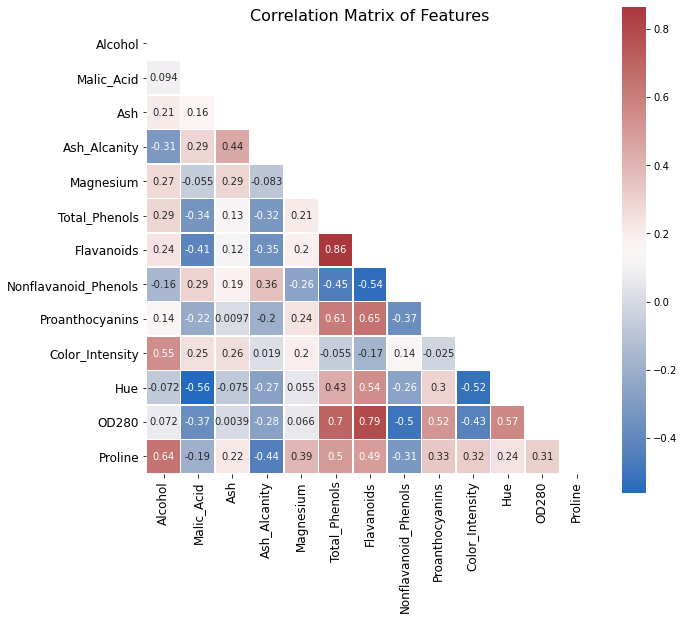

In [12]:
#看變數之間的相關性高低
import seaborn
import pandas as pd

df=data.drop("Customer_Segment",axis=1)
ratings = np.array(df)
categories = df.columns

#df = pd.DataFrame(ratings, columns = categories)

R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask
plt.figure(figsize=(10, 10 ))
#seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag') #熱力圖
seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', square=True, 
                linewidth=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

根據上圖可以發現，大部分變數之間的相關性較低（0.5以下），其中以total_phenols 和 Flavanoids 兩變數的相關性最高;Flavanoids與OD280則為次高

2.繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考，參考如圖二上排。

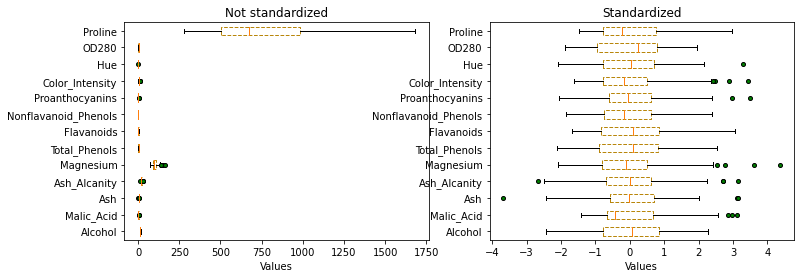

In [13]:
fig = plt.figure(figsize=[12,4])
ax = fig.subplots(1, 2)
boxprops = dict(linestyle = "--", linewidth = 1, \
color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green",
markersize = 4, linestyle = "none")
ax[0].boxplot(ratings,boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax[0].set_xlabel("Values")
ax[0].set_title("Not standardized")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings)

ax[1].boxplot(ratings_, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax[1].set_xlabel("Values")
ax[1].set_title("Standardized")

plt.show()

根據上方座右兩圖的比較結果，可以發現若變數未經過標準化，則不同變數之間的值域有較大的差異，因此在進行主成分分析之前，需要對資料進行標準化，以避免某些變數的影響過大。

3.進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

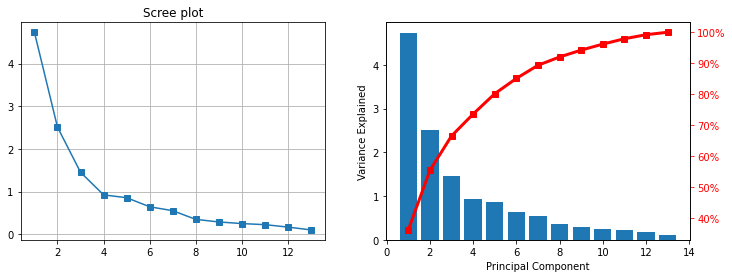

In [14]:
N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
Tmp = ratings_ - np.tile(mu_x, (N, 1))
Sx_formula = Tmp.T @ Tmp / (N - 1)

from numpy.linalg import eig 
w, v = eig(Sx_formula) #計算特徵向量
idx = np.argsort(w)[::-1] #數組值從大到小的索引值
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T #diag找對角線元素

fig = plt.figure(figsize=[12,4])
ax = fig.subplots(1, 2)
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker="s")
ax[0].set_title("Scree plot")
ax[0].grid(True)

from matplotlib.ticker import PercentFormatter

x = np.arange(1, 1+len(eigvals))
ax[1].bar(x, eigvals)
ax[1].set_xlabel("Principal Component")
ax[1].set_ylabel("Variance Explained")

ax2 = ax[1].twinx() #在圖片中共用x軸,不共用y軸
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
    marker="s", color="red", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.show()


根據上方兩圖，可以看到大約需要8個主成分來解釋約90％的變異性，而前兩個主成分的特徵值明顯大於其他主成分，可以解釋約56％的變異性。因此，在進行PCA時，可以將維度降至2維來保留大部分的變異性。

4.資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如圖二下排左。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

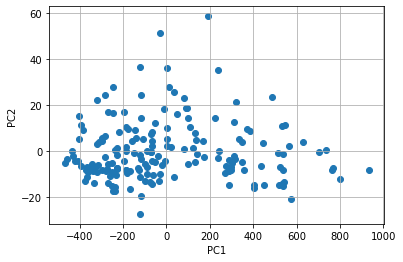

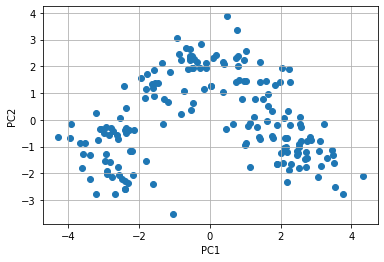

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components=2)
old_X = pca.fit_transform(ratings)

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(old_X[:, 0], old_X[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

pca = PCA(n_components=2)
new_X = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(new_X[:, 0], new_X[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()



從散佈圖中，可以看到存在一定程度的分群現象。但是，無法從兩個主成分的散布圖中清楚地看出三個群組。這可能是因為資料的分佈情況並不是很理想，或者只使用了前兩個主成分而其他重要的成分被省略了。此外，標準化和不標準化對於結果的影響也是值得注意的。由於資料的特徵具有不同的尺度，進行標準化可以使得各個特徵的權重更加平等，進而對分析結果產生較好的影響。

5.再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色，如圖二下排右。

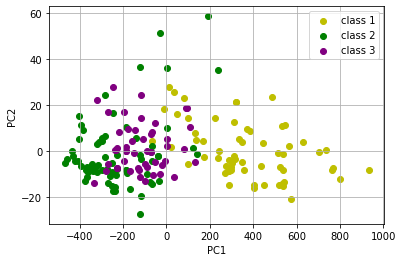

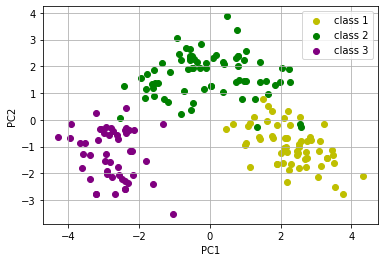

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
labels = data.iloc[:, -1].values
for i in range(len(labels)):
    if labels[i]==1:
        ax.scatter(old_X[i, 0], old_X[i, 1],c="y")
    elif labels[i]==2:
        ax.scatter(old_X[i, 0], old_X[i, 1],c="g")
    else: 
        ax.scatter(old_X[i, 0], old_X[i, 1],c="purple")
ax.scatter(old_X[0,0],old_X[0,1],c="y",label="class 1")            
ax.scatter(old_X[100,0],old_X[100,1],c="g",label="class 2")            
ax.scatter(old_X[len(old_X)-1,0],old_X[len(old_X)-1,1],c="purple",label="class 3")            

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
for i in range(len(labels)):
    if labels[i]==1:
        ax.scatter(new_X[i, 0], new_X[i, 1],c="y")
    elif labels[i]==2:
        ax.scatter(new_X[i, 0], new_X[i, 1],c="g")
    else: 
        ax.scatter(new_X[i, 0], new_X[i, 1],c="purple")
ax.scatter(new_X[0,0],new_X[0,1],c="y",label="class 1")            
ax.scatter(new_X[100,0],new_X[100,1],c="g",label="class 2")            
ax.scatter(new_X[len(new_X)-1,0],new_X[len(new_X)-1,1],c="purple",label="class 3")            

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.legend()
plt.show()

6.如果採三個主成分，則可繪製如圖三與圖四的立體圖。觀察圖三、四是否比圖二具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

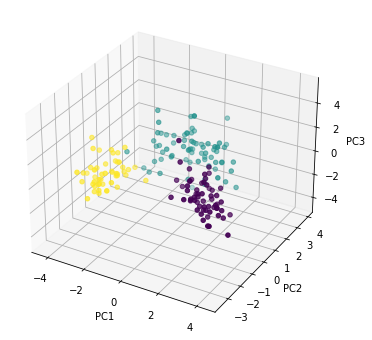

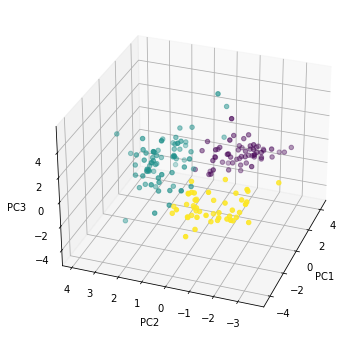

In [17]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
labels = data.iloc[:, -1].values

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

ax1.view_init(elev=30, azim=200)
plt.show()

繪製三個主成分的立體圖可以更直觀地觀察資料的分布情況，且前三個主成分比起前兩個主成分可以解釋更多一些的資料變異性，因此根據上圖可以發現立體圖會有更好的群組分辨能力。

7. Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？
若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

In [18]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

# 進行主成分分析
pca = PCA(n_components=2)
pca.fit(data)

# 印出主成分分析的係數
print(pca.components_)

[[-0.13632501  0.22267638 -0.00225793  0.22429849 -0.12463016 -0.35926404
  -0.39071171  0.2670012  -0.2790625   0.08931829 -0.27682265 -0.35052618
  -0.26951525  0.39366953]
 [-0.48416087 -0.22359095 -0.31585588  0.01161574 -0.30055143 -0.06711983
   0.00131345 -0.0269887  -0.04122256 -0.52978274  0.27790735  0.16277625
  -0.36605886 -0.00569041]]


可以從 Z_1 和 Z_2 的組成係數來觀察原變數的相對重要性，係數絕對值越大表示該變數對 Z_1 或 Z_2 的貢獻越大。從Wine資料的主成分分析結果中，Z_1 的組成係數最大的原變數為Flavanoids、Total phenols、OD280；而Z_2 的組成係數最大的原變數為Malic_acid、Ash、Ash_Alcalinity。因此，可以認為Flavanoids、Total phenols、OD280是重要的變數，而Malic_acid、Ash、Ash_Alcalinity是相對不重要的變數。
<p>
與原變數間的相關係數圖對照可以發現，組成係數絕對值較大的原變數通常與其他變數之間的相關性較高。例如Flavanoids和Total phenols的相關係數為0.86，與它們的組成係數相對應的絕對值也較大。因此，主成分分析結果中變數的組成係數與原變數之間的相關係數圖是一致的，兩者都可以揭示變數之間的相關性和相對重要性。

<h3>習題 2</h3>
資料來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數 30 個，樣本數 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data  # 特徵資料
y = cancer.target  # 目標資料
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

Number of samples: 569
Number of features: 30


1.繪製相關係數圖，由底下三張圖中可以看出，許多變量之間存在較強的正相關，例如radius和mean perimeter之間相關係數為0.997，mean area和mean radius之間相關係數為0.987，mean perimeter和mean area之間相關係數為0.987

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 將數據集轉換為 pandas.DataFrame
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns=np.append(cancer['feature_names'], ['target']))

# 計算相關係數矩陣
corr = df.corr()

# 分成(10,10,10)
corr1 = corr.iloc[:30, :10]
corr3 = corr.iloc[:30, 10:20]
corr2 = corr.iloc[:30, 20:]

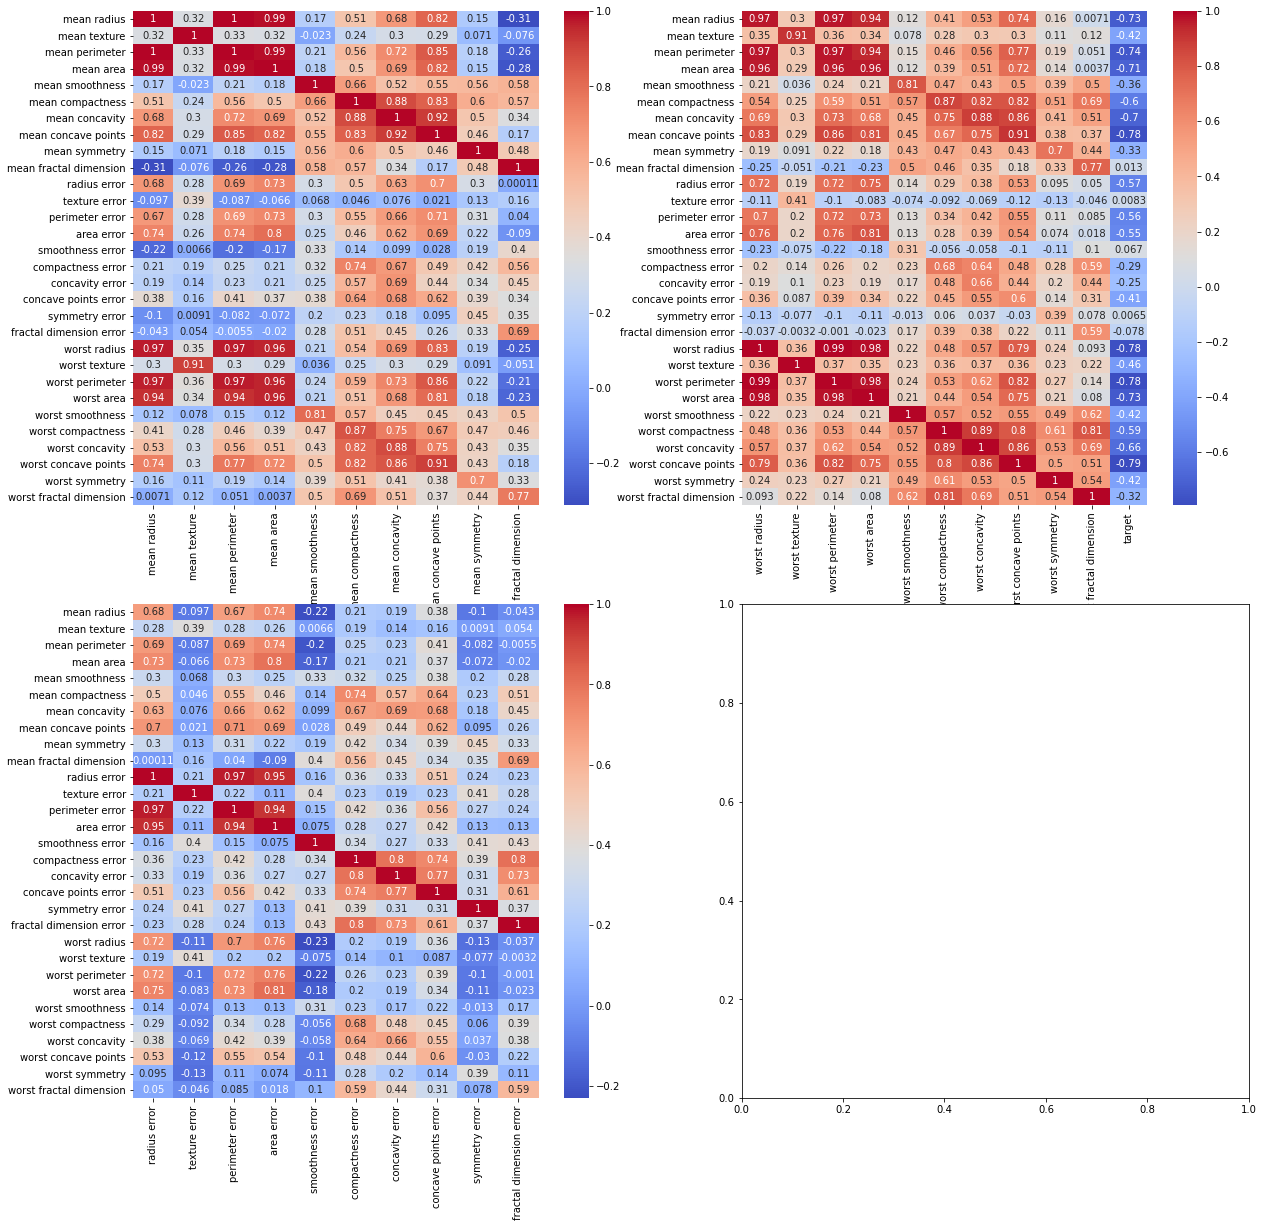

In [21]:
# 繪製相關係數圖
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.heatmap(corr1, annot=True, cmap='coolwarm', ax=axes[0][0])
sns.heatmap(corr2, annot=True, cmap='coolwarm', ax=axes[0][1])
sns.heatmap(corr3, annot=True, cmap='coolwarm', ax=axes[1][0])

plt.show()


2 繪製盒鬚圖後可以發現每個變量的尺度差異很大，因此這些變量需要進行標準化才能有效地進行比較。

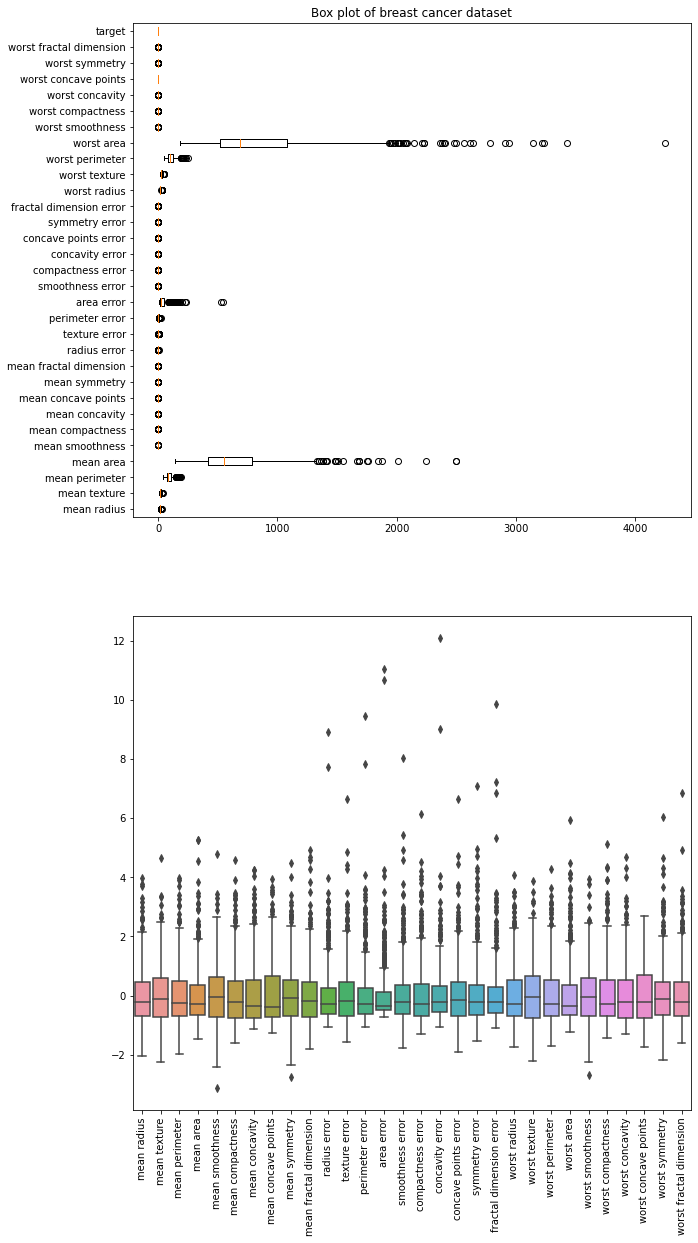

In [22]:
# 繪製 box plot
fig, axes = plt.subplots(2, 1, figsize=(10, 20))
axes[0].boxplot(df.values, vert=False, labels=df.columns)
axes[0].set_title('Box plot of breast cancer dataset')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cancer.feature_names)
sns.boxplot(data=X_scaled,ax=axes[1]).set_xticklabels(rotation=90, labels=X_scaled.columns)
plt.show()

3 進行主成分分析，繪製特徵值由大而小的分布與 scree plot，從特徵值分布圖中可以看出，大約需要10個主成分來解釋約95％的變異性，而前5個主成分可以解釋約85％的變異性。因此，在進行PCA時，可以將維度降至5維來保留大部分的變異性。

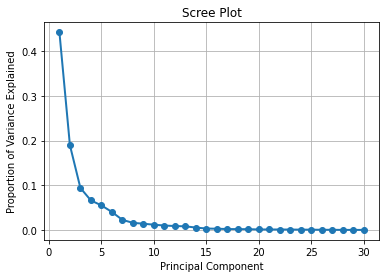

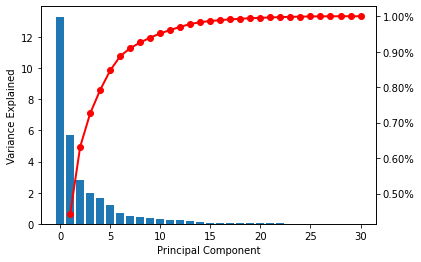

In [23]:
pca = PCA()
pca=pca.fit(X_scaled)

plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.show()

fig, ax = plt.subplots()
eigvals = pca.explained_variance_
sorted_eigvals = np.sort(eigvals)[::-1]

# 繪製eigvals的直方圖
ax.bar(np.arange(len(eigvals)), sorted_eigvals)
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained")

ax2 = ax.twinx()
ax2.plot(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.show()



4 繪製散佈圖，從圖中可以看出，樣本在主成分空間中並沒有明顯的聚集效應，無法區分為兩個群組。而進行標準化後的資料可以看出，這些樣本可以大致區分為兩個群組，並且有較少的重疊區域

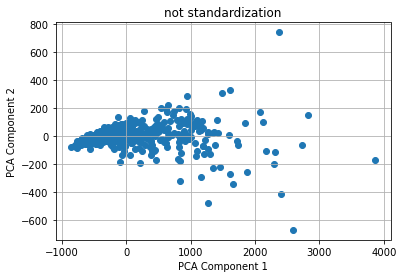

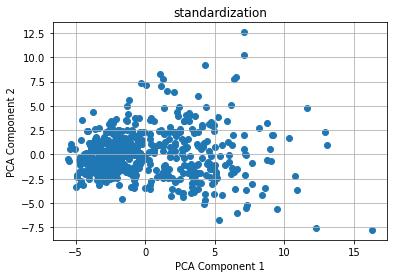

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
_X_pca= pca.fit_transform(X)

plt.scatter(_X_pca[:, 0], _X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("not standardization")
plt.grid()
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("standardization")
plt.grid()
plt.show()


5 利用前兩個主成分進行主成分分析後，將資料點依據標籤著色，可以看出有明顯的分群現象。特別是將資料標準化後，分群更為明顯

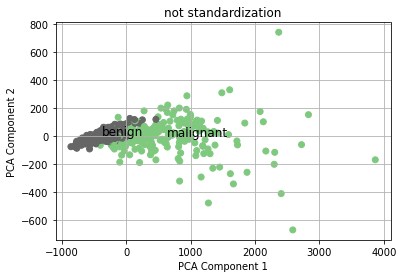

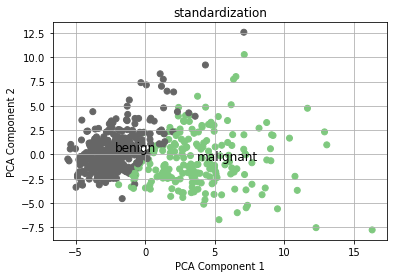

In [25]:
plt.scatter(_X_pca[:,0], _X_pca[:,1], c=y, cmap="Accent")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.title("not standardization")

target_names = cancer.target_names
for i, target_name in enumerate(target_names):
    plt.text(_X_pca[y == i, 0].mean(), _X_pca[y == i, 1].mean(), target_name, fontsize=12)

plt.show()

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="Accent")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.title("standardization")

target_names = cancer.target_names
for i, target_name in enumerate(target_names):
    plt.text(X_pca[y == i, 0].mean(), X_pca[y == i, 1].mean(), target_name, fontsize=12)

plt.show()


In [26]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


6.採用三個主成分，並繪製立體圖，藉由旋轉立體圖找到更好區分良性腫瘤與惡性腫瘤的視角

In [27]:
import plotly.graph_objs as go
import plotly.express as px

X = cancer.data
labels = cancer.target

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 使用 plotly 繪製立體圖
fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2, color=labels, size=[5]*len(X),
    labels={"0": "PC1", "1": "PC2", "2": "PC3"},
    hover_name=target_names[cancer.target],
    title="Breast Cancer Tumor Dataset"
)
fig.show()

In [33]:
#target_names[cancer.target]
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

7. 可否從 Z_1 與 Z_2 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

可以利用Z_1和Z_2的組成係數來觀察原變數的相對重要性。組成係數越大，代表該原變數在主成分中的貢獻越大，反之則越小。
<br> 
從組成係數可以看出，在第一主成分中，與腫瘤大小和形狀相關的變數（如radius_mean、texture_mean、perimeter_mean和area_mean）對於解釋變異性最有貢獻，而與腫瘤細胞大小和形態有關的變數（如smoothness_mean、compactness_mean、concavity_mean和concave points_mean）對於第一主成分的貢獻相對較小。
<br>
在第二主成分中，與腫瘤大小和形狀有關的變數（如radius_se、perimeter_se和area_se）對於解釋變異性最有貢獻，而與腫瘤細胞大小和形態有關的變數（如concavity_se、concave points_se、compactness_se）對於第二主成分的貢獻相對較大。


In [28]:
df = pd.DataFrame(X_scaled, columns=cancer.feature_names)

# 進行主成分分析
pca = PCA(n_components=2)
pca.fit(df)

# 印出主成分分析的係數
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
